In [1]:
# ===============================
# 📦 MACHINE LEARNING IMPORTS
# ===============================

# Core
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing & model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ML models (Sklearn)
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve,
    mean_absolute_error, mean_squared_error, r2_score
)

# XGBoost
from xgboost import XGBClassifier, XGBRegressor

# ===============================
# ⚙️ Visualization Settings
# ===============================
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
train = pd.read_csv("../data/train.csv",parse_dates=["Date Rptd", "DATE OCC"])
test = pd.read_csv("../data/test.csv",parse_dates=["Date Rptd", "DATE OCC"])

ValueError: Contour levels must be increasing

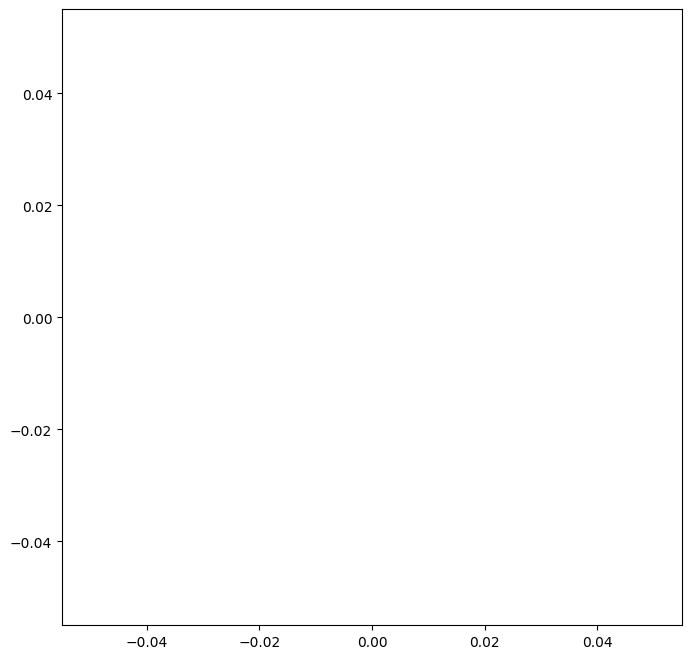

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("data.csv")

# Keep only valid numeric coordinates
df = df.dropna(subset=['LAT', 'LON'])
df = df[(df['LAT'].apply(np.isreal)) & (df['LON'].apply(np.isreal))]

# Convert to float if needed
df['LAT'] = df['LAT'].astype(float)
df['LON'] = df['LON'].astype(float)

# Check if there are enough unique points
if df['LAT'].nunique() < 5 or df['LON'].nunique() < 5:
    raise ValueError("Not enough unique coordinates to plot a density map.")

plt.figure(figsize=(8, 8))

sns.kdeplot(
    x=df['LON'],
    y=df['LAT'],
    fill=True,
    cmap="Reds",
    thresh=0.05,
    levels=20,       # ✅ keep small so levels are strictly increasing
    bw_adjust=0.5,   # smoothness
)

plt.title("Incident Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [3]:
a=train.isnull().sum() / train.shape[0] *100
a[a >0]

Mocodes           16.341113
Vict Sex          16.078371
Vict Descent      16.079560
Premis Cd          0.002378
Premis Desc        0.036855
Weapon Used Cd    64.665391
Weapon Desc       64.665391
Crm Cd 1           0.002378
Crm Cd 2          93.716786
Crm Cd 3          99.896568
Crm Cd 4          99.996433
Cross Street      81.924316
dtype: float64

In [4]:
print(len(train["Mocodes"].unique()))

34959


In [5]:
train.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

In [6]:
train = train[train["Crm Cd"] == train["Crm Cd 1"]]

In [7]:
cols_train = ["DR_NO","AREA NAME","Weapon Desc","Status Desc","Premis Desc",
              "Crm Cd 1","Crm Cd 2","Crm Cd 3","Crm Cd 4","Crm Cd Desc"]
train.drop(columns=[c for c in cols_train if c in train.columns], inplace=True)

cols_test = ["DR_NO","AREA NAME","Weapon Desc","Status Desc","Premis Desc"]
test.drop(columns=[c for c in cols_test if c in test.columns], inplace=True)

In [8]:
train

,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Crm Cd,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,LOCATION,Cross Street,LAT,LON
0,2020-10-17,2020-10-15,2100,15,1581,510,NaN,0,NaN,NaN,101.0,NaN,IC,4300 WHITSETT AV,NaN,34.1486,-118.4052
1,2020-03-24,2020-03-24,1430,7,705,626,0416 1814 1402,43,F,W,501.0,400.0,AA,800 N ALTA VISTA BL,NaN,34.0853,-118.3475
2,2020-06-14,2020-06-14,1030,3,362,230,1251 1259 2024 1815 0554 0334 0913 0400 1402,17,M,H,502.0,200.0,JA,4600 OBAMA BL,NaN,34.0170,-118.3477
3,2020-09-12,2020-09-08,1528,15,1585,341,0325 0216,0,M,O,404.0,NaN,IC,11200 W VENTURA BL,NaN,34.1430,-118.3727
4,2020-12-14,2020-12-14,805,8,853,740,0329 1822,52,M,W,101.0,NaN,AA,BARRINGTON,NEBRASKA,34.0445,-118.4491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84108,2020-02-25,2020-02-25,2100,12,1211,230,1822 0400 0411 0906,24,M,B,102.0,223.0,IC,SLAUSON AV,7TH AV,33.9891,-118.3247
84109,2020-03-06,2020-03-06,920,12,1273,626,2000 0913 1813 0337 0444,35,F,B,102.0,400.0,IC,2000 W MANCHESTER AV,NaN,33.9600,-118.3134
84110,2020-10-31,2020-10-31,30,18,1842,230,1822 1300 1309 0416 0400 1206 2033,25,M,B,101.0,307.0,IC,111TH ST,SAN PEDRO,33.9348,-118.2695
84111,2022-10-17,2020-05-14,2100,13,1367,624,0416 2000 0913 0444,53,F,H,121.0,400.0,IC,VERNON AV,ALAMEDA ST,34.0039,-118.2392


In [9]:
test

,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,LOCATION,Cross Street,LAT,LON
0,2020-03-08,2020-03-08,2245,2,221,0913 1402 0602 0561 0334 0421 0432,64,M,H,502.0,205.0,AO,4200 OAKWOOD AV,NaN,34.0777,-118.2982
1,2020-12-11,2020-12-11,1630,14,1494,2000 0400 0416,27,F,B,212.0,400.0,IC,400 WORLD WY,NaN,33.9431,-118.4081
2,2020-07-18,2020-07-18,1330,7,701,1822 1606 0344,64,M,W,502.0,NaN,IC,700 N ORLANDO AV,NaN,34.0836,-118.3731
3,2020-07-18,2020-07-17,2200,7,745,0416,21,M,H,101.0,400.0,AO,LA BREA AV,PICO BL,34.0572,-118.3482
4,2020-06-16,2020-05-30,2200,1,163,0329,42,M,W,203.0,NaN,IC,700 S BROADWAY,NaN,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,2020-04-13,2020-04-13,1200,1,156,1218 0416 0429 0344 1268 1822,51,M,H,109.0,400.0,IC,5TH,SAN JULIAN,34.0446,-118.2450
9342,2020-02-23,2020-02-23,1520,3,375,0329 1822,41,M,H,501.0,400.0,IC,1600 W 39TH PL,NaN,34.0137,-118.3089
9343,2020-11-02,2020-11-02,1800,16,1695,1822 0421,49,M,H,502.0,511.0,IC,7600 VINELAND AV,NaN,34.2084,-118.3703
9344,2020-08-23,2020-08-22,1900,3,373,0329,19,X,X,203.0,NaN,AO,3800 CRENSHAW BL,NaN,34.0170,-118.3349


In [10]:
train.drop(columns=["Cross Street",],inplace=True)
test.drop(columns=["Cross Street",],inplace=True)

In [11]:
train = train[train["Premis Cd"].notna()]
test = test[test["Premis Cd"].notna()]

In [12]:
from sklearn.preprocessing import  MultiLabelBinarizer
mlb = MultiLabelBinarizer()

train['Mocodes'] = train['Mocodes'].astype('str').apply(lambda x: list(map(int, x.split())) if x != 'nan' else [])

test['Mocodes'] = test['Mocodes'].astype('str').apply(lambda x: list(map(int, x.split())) if x != 'nan' else [])

train = pd.concat([train.reset_index(drop=True), pd.DataFrame(mlb.fit_transform(train["Mocodes"]), columns=[f'Mocodes_{num}' for num in mlb.classes_])], axis=1)

test = pd.concat([test.reset_index(drop=True), pd.DataFrame(mlb.transform(test["Mocodes"]), columns=[f'Mocodes_{num}' for num in mlb.classes_])], axis=1)
train
train.drop(columns=["Mocodes"],inplace=True)
test.drop(columns=["Mocodes"],inplace=True)

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
train["Vict Sex"] = imputer.fit_transform(train[["Vict Sex"]]).squeeze()
test["Vict Sex"] = imputer.fit_transform(test[["Vict Sex"]]).squeeze()

In [14]:

train["Vict Descent"] = imputer.fit_transform(train[["Vict Descent"]]).squeeze()
test["Vict Descent"] = imputer.fit_transform(test[["Vict Descent"]]).squeeze()

In [15]:
le = LabelEncoder()
train["Vict Sex"] = le.fit_transform(train["Vict Sex"])
test["Vict Sex"] = le.fit_transform(test["Vict Sex"])

train["Vict Descent"] = le.fit_transform(train["Vict Descent"])
test["Vict Descent"] = le.fit_transform(test["Vict Descent"])

train["Status"] = le.fit_transform(train["Status"])
test["Status"] = le.fit_transform(test["Status"])

In [16]:
train.drop(columns=["Weapon Used Cd"],inplace=True)
test.drop(columns=["Weapon Used Cd"],inplace=True)

In [17]:
train.describe(include="object")

,LOCATION
count,84084
unique,29686
top,6TH ST
freq,148


In [18]:
# train.drop(columns=["LOCATION"],inplace=True)
# test.drop(columns=["LOCATION"],inplace=True)



train.drop(columns=["LAT"],inplace=True)
test.drop(columns=["LAT"],inplace=True)

train.drop(columns=["LON"],inplace=True)
test.drop(columns=["LON"],inplace=True)

train["LOCATION"] = le.fit_transform(train["LOCATION"])
test["LOCATION"] = le.fit_transform(test["LOCATION"])

In [19]:
train["Rptd_OCC_Diff"] = (train["Date Rptd"] - train["DATE OCC"]).dt.days
test["Rptd_OCC_Diff"] = (test["Date Rptd"] - test["DATE OCC"]).dt.days

train.drop(columns=["Date Rptd"], inplace=True)
test.drop(columns=["Date Rptd"], inplace=True)

In [20]:
print(train["DATE OCC"].dt.year.unique())
print(train["DATE OCC"].dt.month.unique())

[2020]
[10  3  6  9 12  5  2  1 11  4  8  7]


In [21]:
train["Month OCC"] = train["DATE OCC"].dt.month
test["Month OCC"] = test["DATE OCC"].dt.month

In [22]:
train.drop(columns=["DATE OCC"], inplace=True)
test.drop(columns=["DATE OCC"], inplace=True)

In [23]:
X = train.drop(columns=["Crm Cd"])
y = train["Crm Cd"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 1️⃣ Create the scaler
scaler = StandardScaler()

# 2️⃣ Fit only on the training set, then transform both
train_scaled = scaler.fit_transform(X_train)
val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test) # our test is x_test

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# ✅ Fit only once on all possible labels (train + test if needed)
le.fit(pd.concat([y_train, y_val]))

# ✅ Transform both sets consistently
y_train = le.transform(y_train)
y_val = le.transform(y_val)

In [26]:
from sklearn.metrics import f1_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    # "Gradient Boosting": GradientBoostingClassifier(),
    # "SVC": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # F1 scores
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')

    print(f"{name}")
    print(f"  Train F1: {f1_train:.4f}")
    print(f"  Val F1:   {f1_val:.4f}")
    print("-" * 40)

Logistic Regression
  Train F1: 0.1203
  Val F1:   0.1217
----------------------------------------
Decision Tree
  Train F1: 1.0000
  Val F1:   0.6860
----------------------------------------
Random Forest
  Train F1: 1.0000
  Val F1:   0.7550
----------------------------------------
XGBoost
  Train F1: 0.8498
  Val F1:   0.7613
----------------------------------------


In [27]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=0,
    random_state=42
)

search.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)
print(search.best_params_)

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'


In [28]:
xgb_tuned = XGBClassifier(subsample= 0.9, n_estimators= 300, max_depth= 7, learning_rate= 0.1, gamma= 1, colsample_bytree= 0.7)
xgb_tuned.fit(X_train, y_train)

    # Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

    # F1 scores
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print(f"{name}")
print(f"  Train F1: {f1_train:.4f}")
print(f"  Val F1:   {f1_val:.4f}")
print("-" * 40)

KeyboardInterrupt: 

In [29]:
xgb_tuned = XGBClassifier(subsample= 0.9, n_estimators= 300, max_depth= 7, learning_rate= 0.1, gamma= 1, colsample_bytree= 0.7)
xgb_tuned.fit(X_train, y_train)

    # Predictions
y_train_pred = xgb_tuned.predict(X_train)
y_val_pred = xgb_tuned.predict(X_val)

    # F1 scores
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print("xgb :")
print(f"  Train F1: {f1_train:.4f}")
print(f"  Val F1:   {f1_val:.4f}")
print("-" * 40)

xgb :
  Train F1: 0.8457
  Val F1:   0.7664
----------------------------------------


In [30]:
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized search
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,            # number of random combinations
    scoring='f1_weighted', 
    cv=3, 
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit
rf_search.fit(X_train, y_train)

# Best parameters & score
print("Best RF Params:", rf_search.best_params_)
print("Best RF F1 Score (CV):", rf_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RF Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best RF F1 Score (CV): 0.722048760126435


In [31]:
rf_tuned = RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False)
rf_tuned.fit(X_train, y_train)

    # Predictions
y_train_pred = rf_tuned.predict(X_train)
y_val_pred = rf_tuned.predict(X_val)

    # F1 scores
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print("RF : ")
print(f"  Train F1: {f1_train:.4f}")
print(f"  Val F1:   {f1_val:.4f}")
print("-" * 40)

RF : 
  Train F1: 0.7817
  Val F1:   0.7300
----------------------------------------


In [32]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier([("xgb",xgb_tuned),("RF",rf_tuned)])

In [33]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier([("xgb",xgb_tuned),("RF",rf_tuned)])
ensemble_model.fit(X_train,y_train)

,estimators,"[('xgb', ...), ('RF', ...)]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None


In [34]:
final_pred = ensemble_model.predict(X_val)
print("final",r2_score(y_val,final_pred))

final 0.6978243813474618


In [35]:
y_test_pred = ensemble_model.predict(test)

In [36]:
# predict test samples
submission =pd.DataFrame({"Crm Cd":y_test_pred})
submission.to_csv('submission.csv', index=False)

In [37]:
import zipfile
import joblib
import os
if not os.path.exists(os.path.join(os.getcwd(), 'crime-detection.ipynb')):
    %notebook -e crime-detection.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['crime-detection.ipynb', 'submission.csv']
compress(file_names)

UsageError: unrecognized arguments: -e


UsageError: unrecognized arguments: -e